<a href="https://colab.research.google.com/github/Asakeblessing/ADS-assignment-2/blob/main/Quantum_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

San francisco Air Traffic Landings Dashboard

Data Preprocessing ( Cleaning)

In [80]:
from google.colab import files
uploaded = files.upload()


Saving air-traffic-landings-statistics.csv to air-traffic-landings-statistics (1).csv


In [81]:
import pandas as pd

df = pd.read_csv('air-traffic-landings-statistics.csv')
df.head()

df.info()      # Shows columns, types, and non-null counts
df.columns     # Lists all column names


# Check for nulls
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22047 entries, 0 to 22046
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              22047 non-null  int64 
 1   Operating Airline            22047 non-null  object
 2   Operating Airline IATA Code  21972 non-null  object
 3   Published Airline            22047 non-null  object
 4   Published Airline IATA Code  21972 non-null  object
 5   GEO Summary                  22047 non-null  object
 6   GEO Region                   22047 non-null  object
 7   Landing Aircraft Type        22047 non-null  object
 8   Aircraft Body Type           22047 non-null  object
 9   Aircraft Manufacturer        22036 non-null  object
 10  Aircraft Model               22047 non-null  object
 11  Aircraft Version             20889 non-null  object
 12  Landing Count                22047 non-null  int64 
 13  Total Landed Weight          22

,0
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,75
Published Airline,0
Published Airline IATA Code,75
GEO Summary,0
GEO Region,0
Landing Aircraft Type,0
Aircraft Body Type,0
Aircraft Manufacturer,11


In [82]:
# Fill categorical nulls with placeholder
df['Aircraft Model'] = df['Aircraft Model'].fillna('Unknown Model')
df['GEO Region'] = df['GEO Region'].fillna('Unknown Region')
df['Aircraft Body Type'] = df['Aircraft Body Type'].fillna('Unknown Body Type')

# Fill numeric nulls with median or mean
df['Landing Count'] = df['Landing Count'].fillna(df['Landing Count'].median())
df['Total Landed Weight'] = df['Total Landed Weight'].fillna(df['Total Landed Weight'].mean())

# Confirm cleaned data
df.isnull().sum()

# Save the cleaned dataframe to a CSV file
df.to_csv('Cleaned_Airtrafficdataset.csv', index=False)

files.download("Cleaned_Airtrafficdataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
# Safe method for replacing nulls in important identifier columns
df['Operating Airline IATA Code'] = df['Operating Airline IATA Code'].fillna('Unknown IATA')
df['Published Airline IATA Code'] = df['Published Airline IATA Code'].fillna('Unknown IATA')
df['Aircraft Manufacturer'] = df['Aircraft Manufacturer'].fillna('Unknown Manufacturer')

# Aircraft Version is optional (can be useful or just a detail)
df['Aircraft Version'] = df['Aircraft Version'].fillna('Unknown Version')


In [84]:
df[['Operating Airline IATA Code', 'Published Airline IATA Code', 'Aircraft Manufacturer', 'Aircraft Version']].isnull().sum()

df.isnull().sum()


,0
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,0
Published Airline,0
Published Airline IATA Code,0
GEO Summary,0
GEO Region,0
Landing Aircraft Type,0
Aircraft Body Type,0
Aircraft Manufacturer,0


In [85]:
# To Convert 'Activity Period' to datetime
df['Activity Period'] = pd.to_datetime(df['Activity Period'], errors='coerce')

print(df['Activity Period'].unique())


<DatetimeArray>
['1970-01-01 00:00:00.000201809', '1970-01-01 00:00:00.000201808',
 '1970-01-01 00:00:00.000201807', '1970-01-01 00:00:00.000201806',
 '1970-01-01 00:00:00.000201805', '1970-01-01 00:00:00.000201804',
 '1970-01-01 00:00:00.000201803', '1970-01-01 00:00:00.000201802',
 '1970-01-01 00:00:00.000201801', '1970-01-01 00:00:00.000201712',
 ...
 '1970-01-01 00:00:00.000200604', '1970-01-01 00:00:00.000200603',
 '1970-01-01 00:00:00.000200602', '1970-01-01 00:00:00.000200601',
 '1970-01-01 00:00:00.000200512', '1970-01-01 00:00:00.000200511',
 '1970-01-01 00:00:00.000200510', '1970-01-01 00:00:00.000200509',
 '1970-01-01 00:00:00.000200508', '1970-01-01 00:00:00.000200507']
Length: 159, dtype: datetime64[ns]


1 a) How the total landed weight vary across different operating airlines and their respective IATA Codes


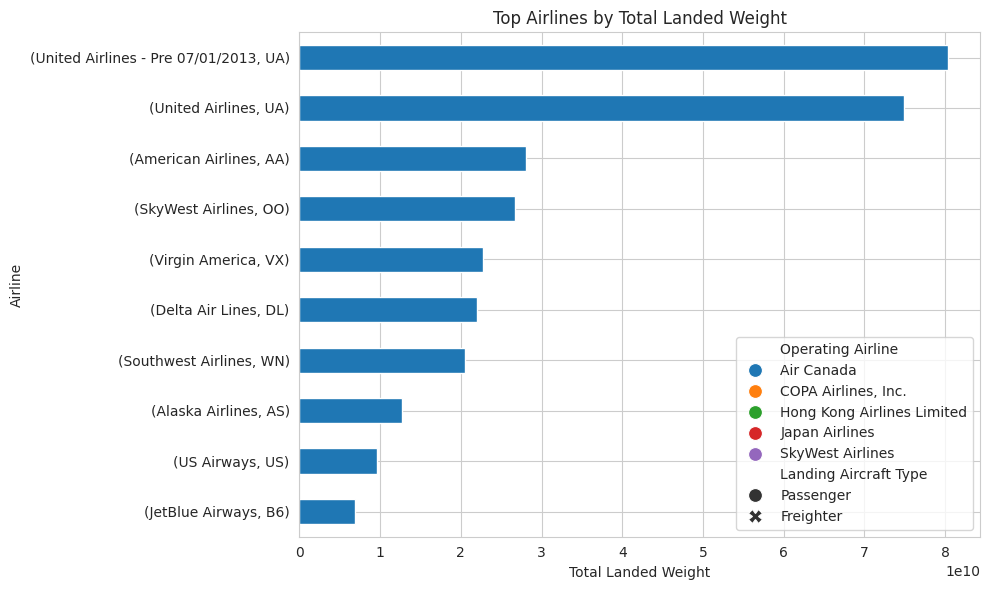

In [86]:
import matplotlib.pyplot as plt

# Group by Operating Airline and Operating Airline IATA Code and sum the Total Landed Weight
weight_by_airline = df.groupby(['Operating Airline', 'Operating Airline IATA Code'])['Total Landed Weight'].sum().sort_values(ascending=False)

# Plot the top 10 airlines by total landed weight
weight_by_airline.head(10).plot(kind='barh', figsize=(10,6), title='Top Airlines by Total Landed Weight')
plt.xlabel('Total Landed Weight')
plt.ylabel('Airline')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

2 a)  Most common geographic summaries and regions for landing operations, and how
do they correlate with landing counts

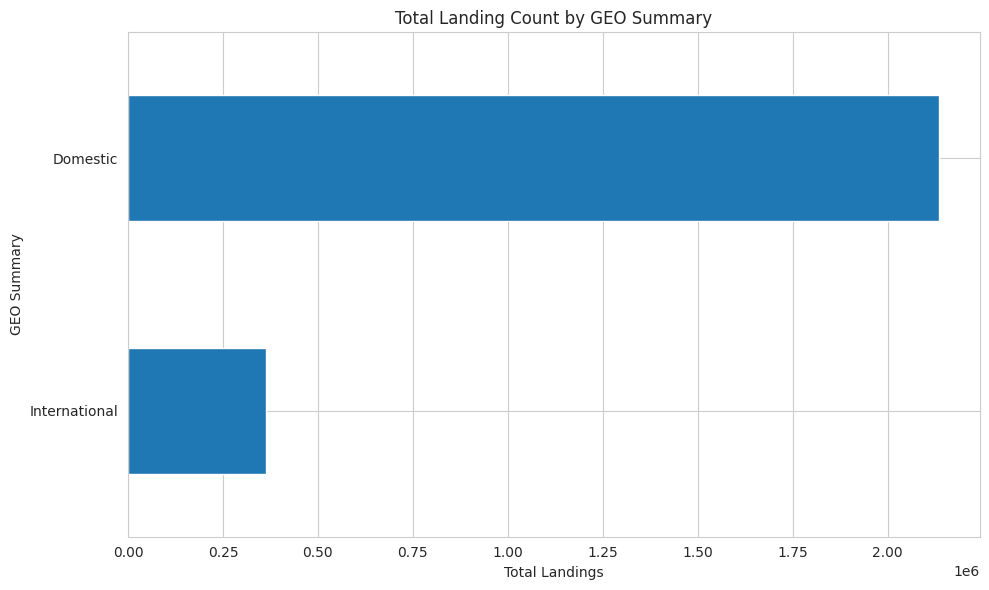

In [87]:
summary_landing = df.groupby('GEO Summary')['Landing Count'].sum().sort_values(ascending=False)

summary_landing.plot(kind='barh', figsize=(10,6), title='Total Landing Count by GEO Summary')
plt.xlabel('Total Landings')
plt.ylabel('GEO Summary')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2 b) Total Landing by Geographc Region

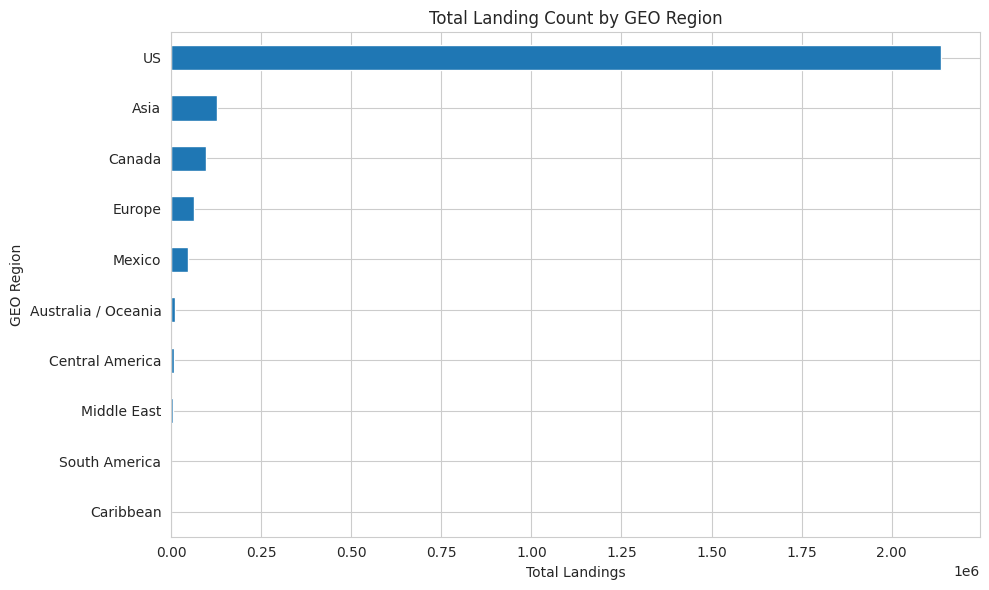

In [88]:
region_landing = df.groupby('GEO Region')['Landing Count'].sum().sort_values(ascending=False)

region_landing.plot(kind='barh', figsize=(10,6), title='Total Landing Count by GEO Region')
plt.xlabel('Total Landings')
plt.ylabel('GEO Region')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2 c)Correlation btw Landing Count Vs Geo Region

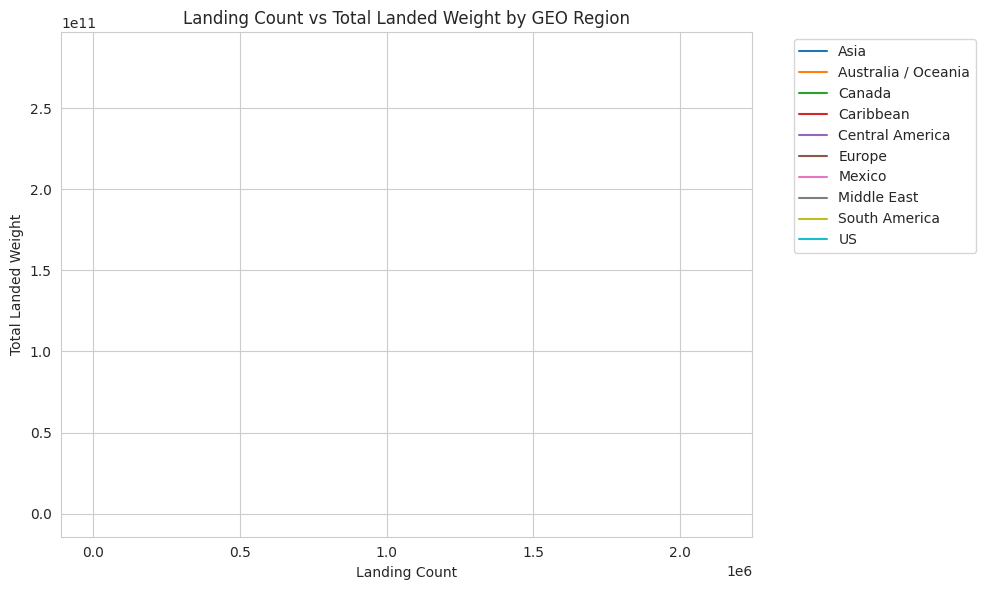

                     Landing Count  Total Landed Weight
Landing Count             1.000000             0.977853
Total Landed Weight       0.977853             1.000000


In [89]:
import seaborn as sns
# To be Group by GEO Region and summarize totals
region_summary = df.groupby('GEO Region')[['Landing Count', 'Total Landed Weight']].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=region_summary, x='Landing Count', y='Total Landed Weight', hue='GEO Region')
plt.title('Landing Count vs Total Landed Weight by GEO Region')
plt.xlabel('Landing Count')
plt.ylabel('Total Landed Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# correlation matrix
print(region_summary[['Landing Count', 'Total Landed Weight']].corr())

2 d)Correlation btw Landing Count Vs Geo Summary

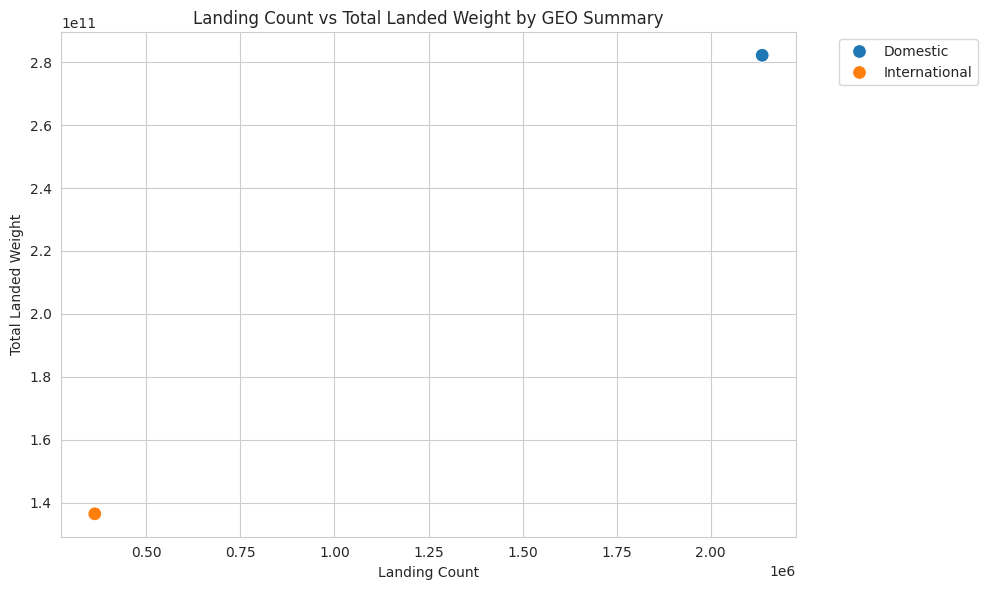

                     Landing Count  Total Landed Weight
Landing Count                  1.0                  1.0
Total Landed Weight            1.0                  1.0


In [90]:
# Group by GEO Summary and summarize totals
summary_data = df.groupby('GEO Summary')[['Landing Count', 'Total Landed Weight']].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=summary_data, x='Landing Count', y='Total Landed Weight', hue='GEO Summary', s=100)
plt.title('Landing Count vs Total Landed Weight by GEO Summary')
plt.xlabel('Landing Count')
plt.ylabel('Total Landed Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# correlation matrix
print(summary_data[['Landing Count', 'Total Landed Weight']].corr())


3 a)Most Used Aircraft Manufacturer For Landing

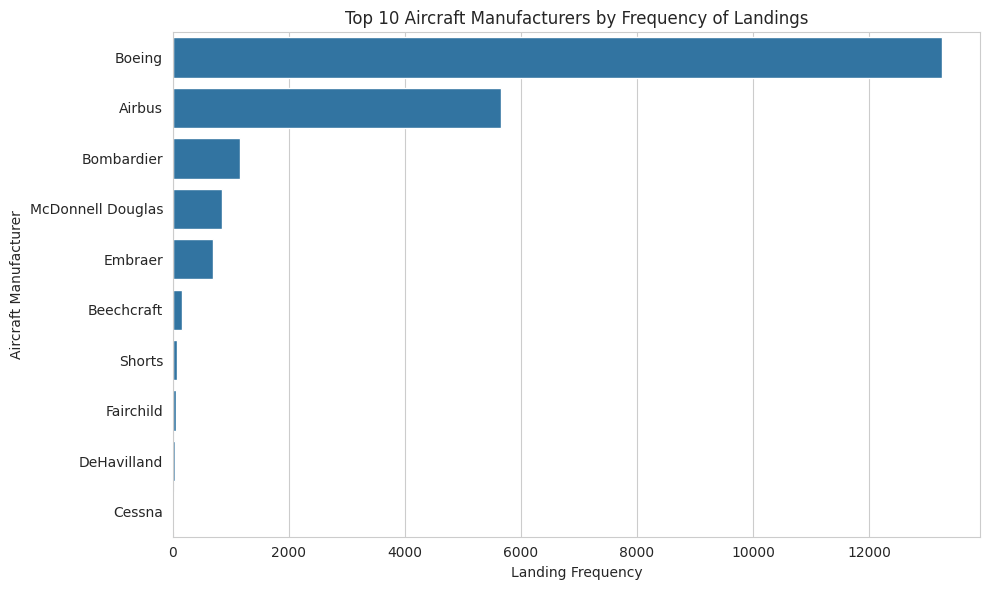

In [91]:
# Count occurrences of each manufacturer
manufacturer_counts = df['Aircraft Manufacturer'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index)
plt.title('Top 10 Aircraft Manufacturers by Frequency of Landings')
plt.xlabel('Landing Frequency')
plt.ylabel('Aircraft Manufacturer')
plt.tight_layout()
plt.show()


3 b)Most Used Aircraft Models for Landing

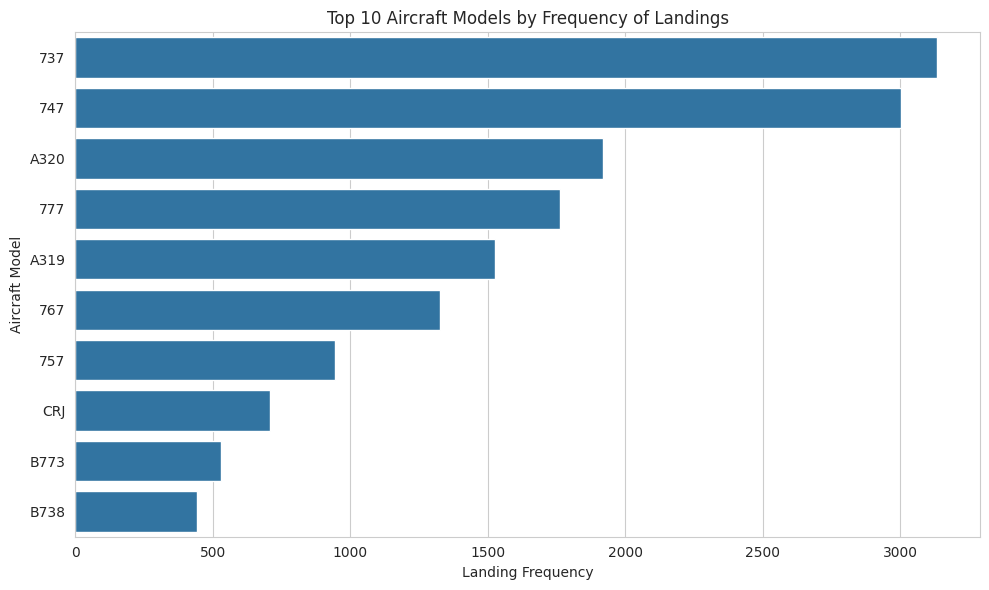

In [92]:
# Count occurrences of each model
model_counts = df['Aircraft Model'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=model_counts.values, y=model_counts.index)
plt.title('Top 10 Aircraft Models by Frequency of Landings')
plt.xlabel('Landing Frequency')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.show()


Most used Aircraft Model Frequency Across Airlines

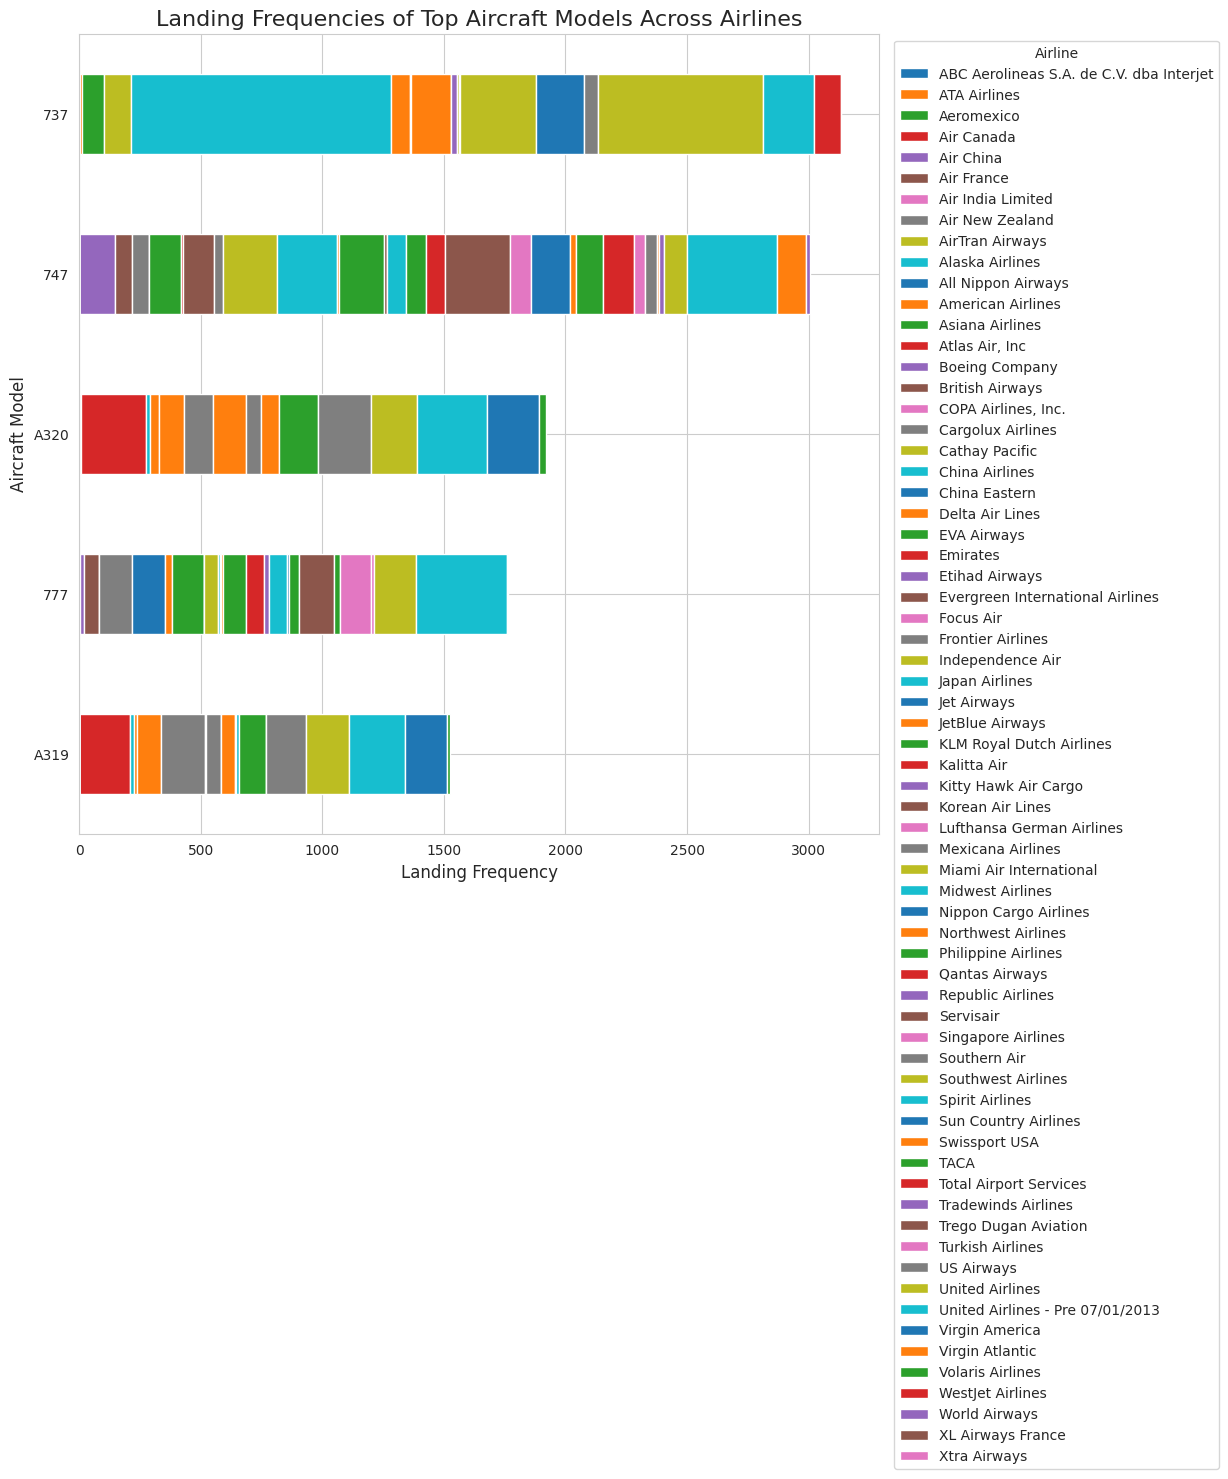

In [93]:
# Filter top 5 aircraft models
top_models = df['Aircraft Model'].value_counts().nlargest(5).index
filtered = df[df['Aircraft Model'].isin(top_models)]

# Group by model and airline
model_airline = filtered.groupby(['Aircraft Model', 'Operating Airline']).size().reset_index(name='Count')

# Pivot to wide format (for barh)
pivot_data = model_airline.pivot(index='Aircraft Model', columns='Operating Airline', values='Count').fillna(0)

# Sort aircraft models by total landing frequency (ascending)
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=True).drop(columns='Total')

# Plot
ax = pivot_data.plot(kind='barh', stacked=True, figsize=(16, 10))

plt.title('Landing Frequencies of Top Aircraft Models Across Airlines', fontsize=16)
plt.xlabel('Landing Frequency', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Airline')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout manually
plt.subplots_adjust(left=0.25, right=0.75, top=0.9, bottom=0.1)

plt.show()


Most Used Manufacturerers and Model Types

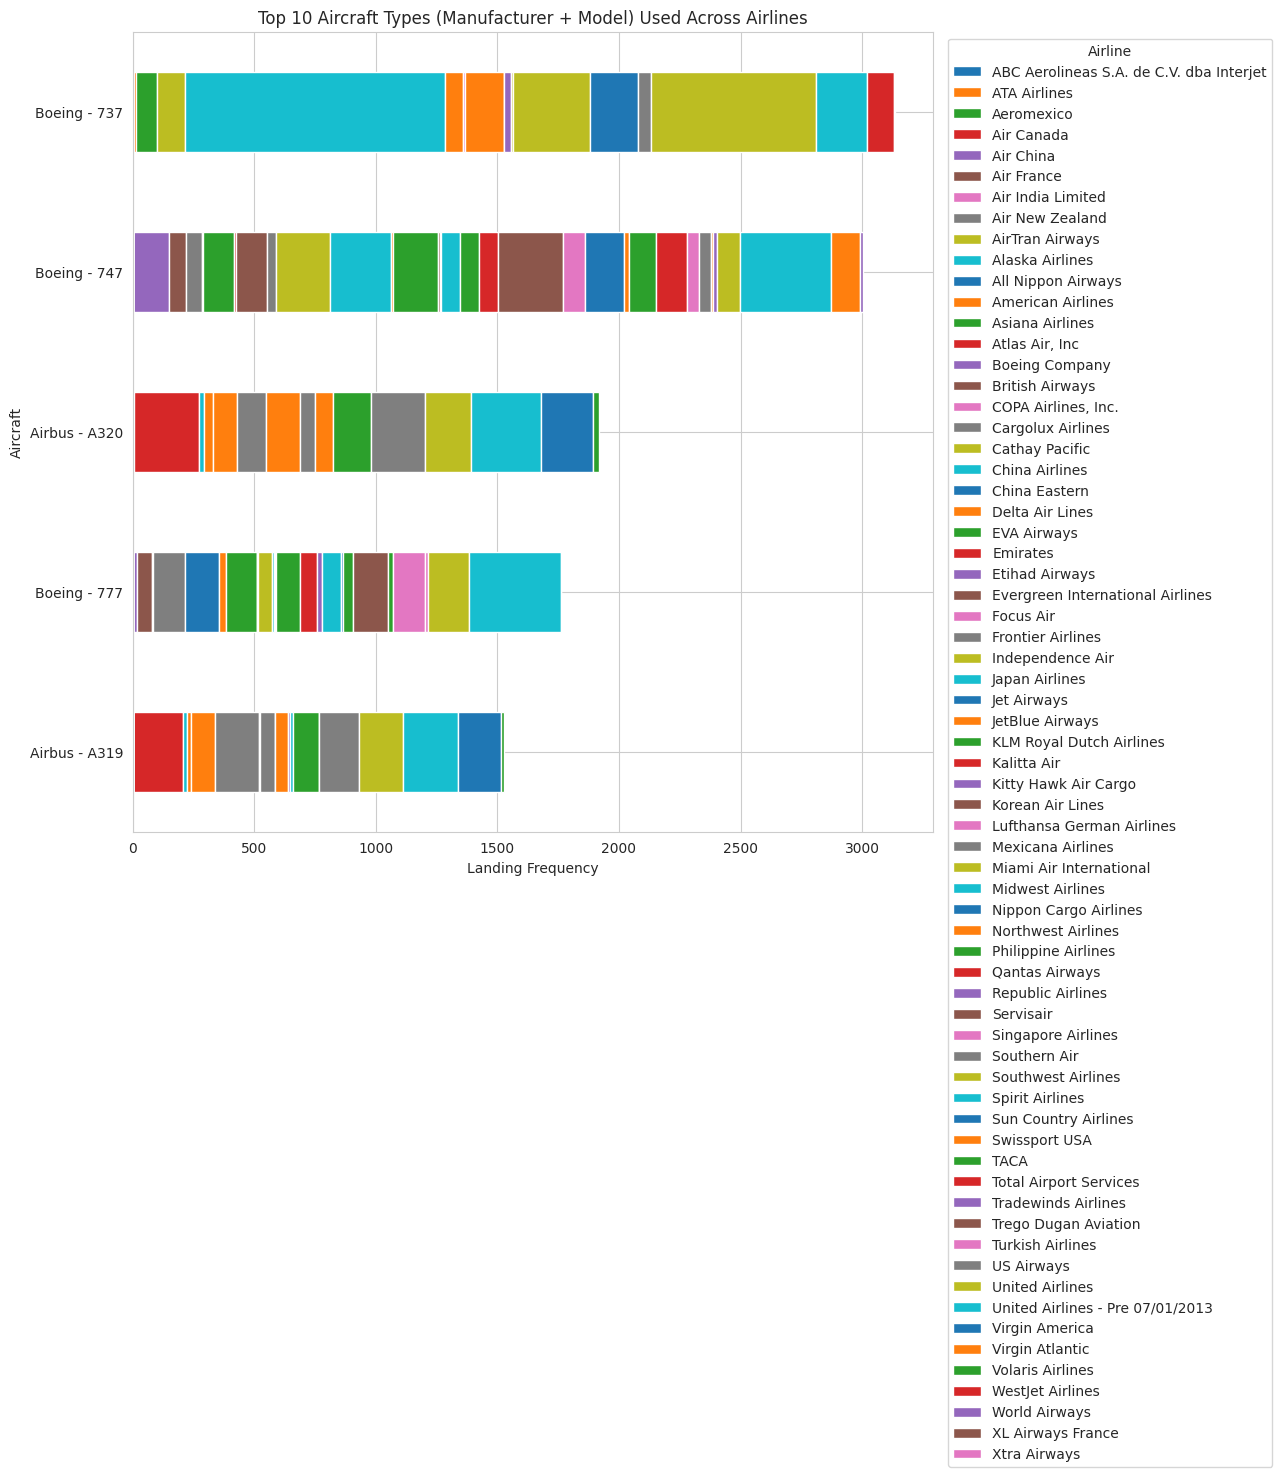

In [94]:
# Step 1: Create a new column combining Manufacturer + Model for uniqueness
df['Manufacturer & Model'] = df['Aircraft Manufacturer'] + " - " + df['Aircraft Model']

# Step 2: Get top 5 most common (combined) aircraft
top_aircraft = df['Manufacturer & Model'].value_counts().nlargest(5).index
filtered = df[df['Manufacturer & Model'].isin(top_aircraft)]

# Step 3: Group by manufacturer+model and airline
aircraft_airline = filtered.groupby(['Manufacturer & Model', 'Operating Airline']).size().reset_index(name='Count')

# Step 4: Pivot for plotting
pivot_data = aircraft_airline.pivot(index='Manufacturer & Model', columns='Operating Airline', values='Count').fillna(0)

# Step 5: Sort from smallest to highest total landings
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('Total', ascending=True).drop(columns='Total')

# Step 6: Plot
ax = pivot_data.plot(kind='barh', stacked=True, figsize=(16, 10))

plt.title('Top 10 Aircraft Types (Manufacturer + Model) Used Across Airlines')
plt.xlabel('Landing Frequency')
plt.ylabel('Aircraft')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Airline')
plt.subplots_adjust(left=0.25, right=0.75, top=0.9, bottom=0.1)
plt.show()


Comparisim of frequencies across Between Different Airlines

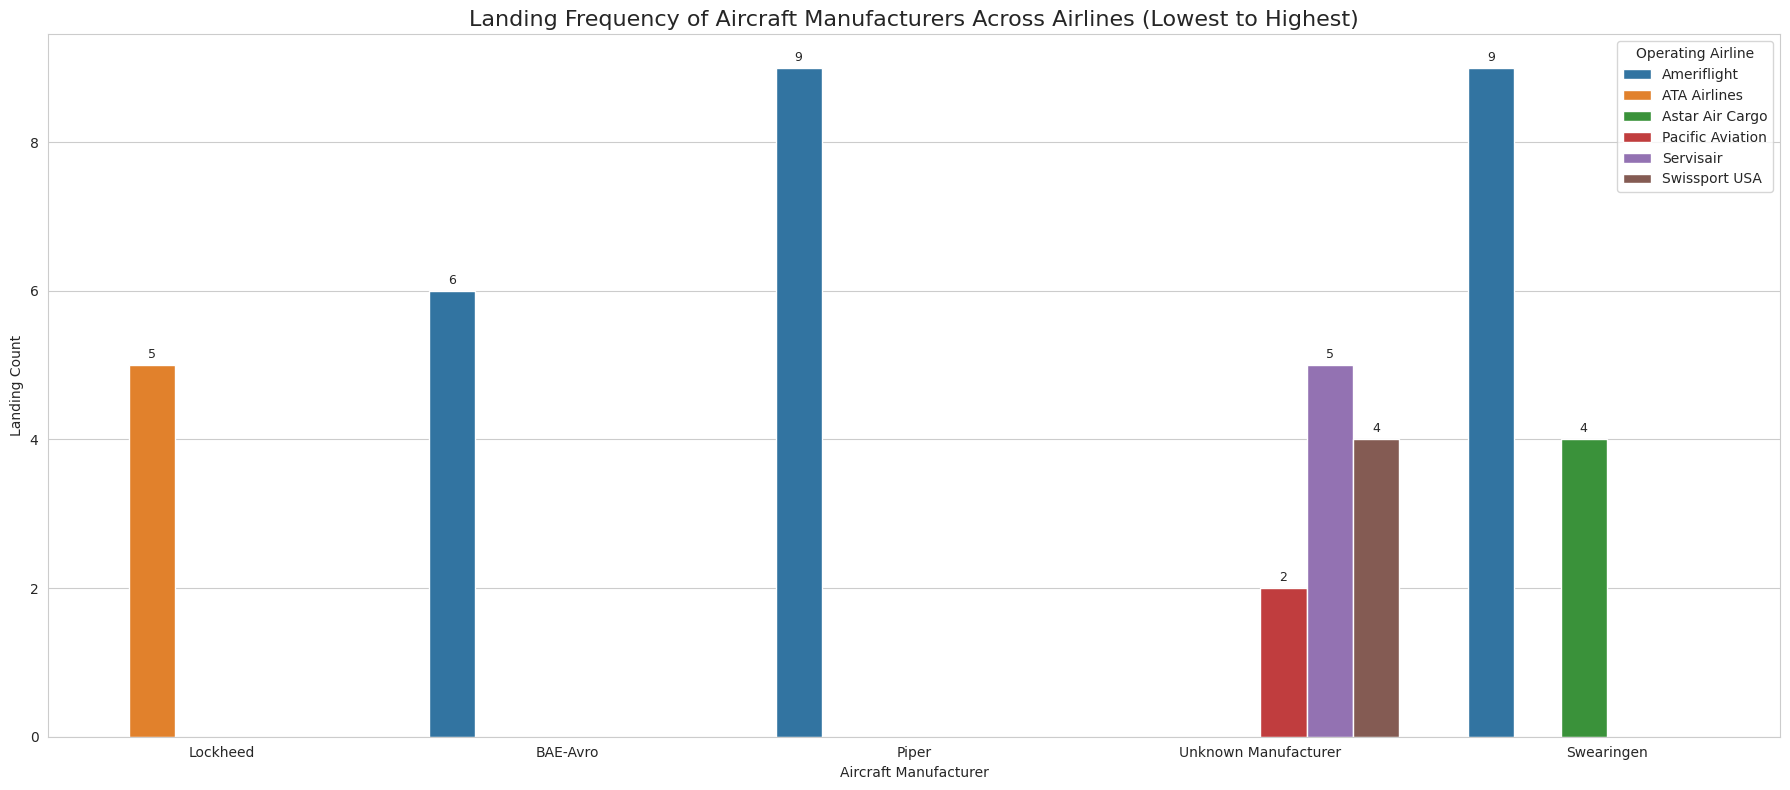

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by manufacturer and airline
manufacturer_airline = df.groupby(['Aircraft Manufacturer', 'Operating Airline']).size().reset_index(name='Count')

# Step 2: Get top 5 manufacturers overall
top_manufacturers = manufacturer_airline.groupby('Aircraft Manufacturer')['Count'].sum().nsmallest(5).index
filtered = manufacturer_airline[manufacturer_airline['Aircraft Manufacturer'].isin(top_manufacturers)]

# Step 3: Sort manufacturers by total count (lowest to highest)
order = (
    filtered.groupby('Aircraft Manufacturer')['Count']
    .sum()
    .sort_values()
    .index
)

# Step 4: Plot setup
plt.figure(figsize=(18, 8))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=filtered,
    x='Aircraft Manufacturer',
    y='Count',
    hue='Operating Airline',
    dodge=True,
    order=order  # apply sorting here
)

# Step 5: Add value labels
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

# Step 6: Final touches
plt.title('Landing Frequency of Aircraft Manufacturers Across Airlines (Lowest to Highest)', fontsize=16)
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Landing Count')
plt.xticks(rotation=0)
plt.legend(title='Operating Airline', loc='upper right')
plt.tight_layout()
plt.show()


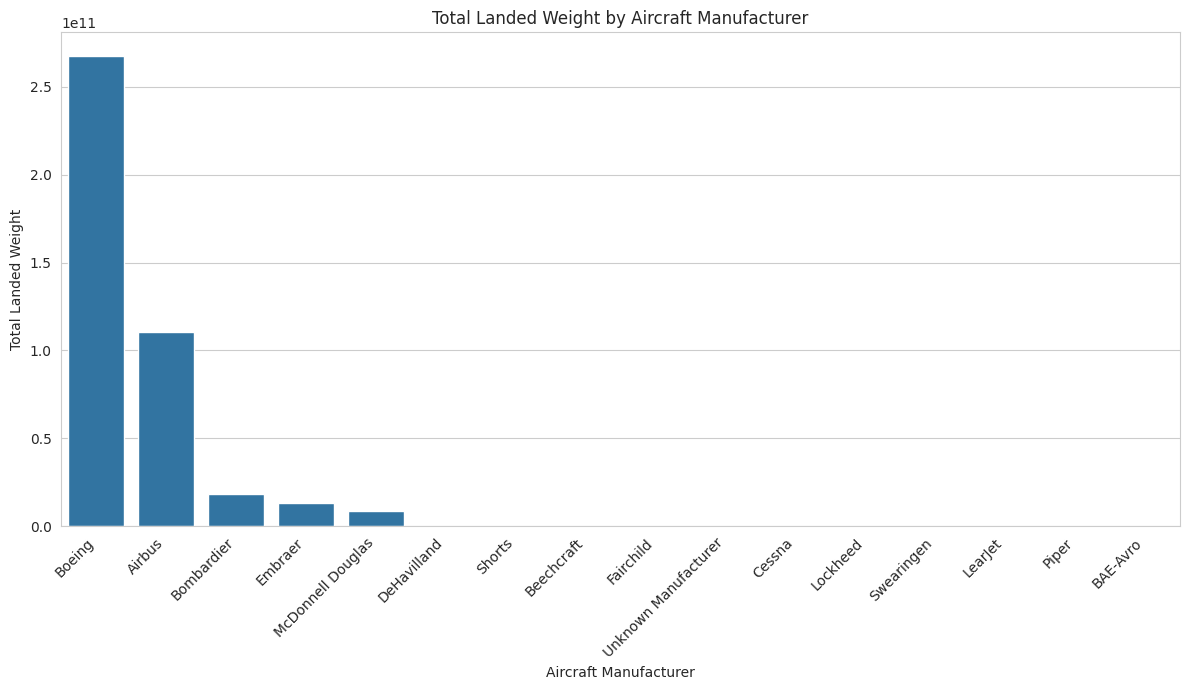

In [96]:
# Grouped by Aircraft Manufacturer and sum of Total Landed Weight
weight_by_manufacturer = df.groupby('Aircraft Manufacturer')['Total Landed Weight'].sum().sort_values(ascending=False)

# Plot the total landed weight by manufacturer
plt.figure(figsize=(12, 7))
sns.barplot(x=weight_by_manufacturer.index, y=weight_by_manufacturer.values)
plt.title('Total Landed Weight by Aircraft Manufacturer')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total Landed Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Compare Total Landed weight by manufacturer

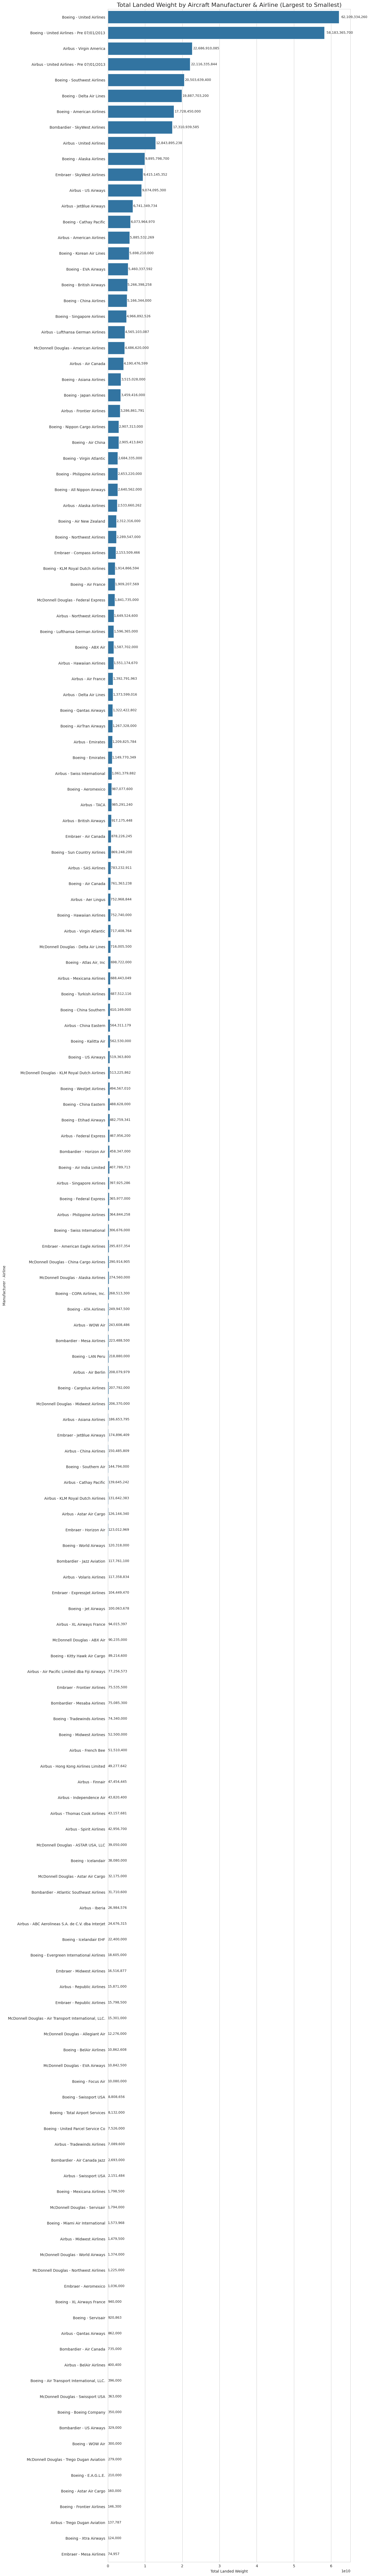

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and filter
weight_by_airline = df.groupby(['Aircraft Manufacturer', 'Operating Airline'])['Total Landed Weight'].sum().reset_index()
top5 = weight_by_airline.groupby('Aircraft Manufacturer')['Total Landed Weight'].sum().nlargest(5).index
filtered = weight_by_airline[weight_by_airline['Aircraft Manufacturer'].isin(top5)].copy()
filtered.loc[:, 'Label'] = filtered['Aircraft Manufacturer'] + " - " + filtered['Operating Airline']
filtered = filtered.sort_values(by='Total Landed Weight', ascending=False)

# Plot
plt.figure(figsize=(14, len(filtered) * 0.6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=filtered,
    y='Label',
    x='Total Landed Weight'  # ← no palette or hue
)

# Add labels
for i, value in enumerate(filtered['Total Landed Weight']):
    ax.text(value + value * 0.01, i, f'{int(value):,}', va='center', fontsize=9)

# Final touches
plt.title('Total Landed Weight by Aircraft Manufacturer & Airline (Largest to Smallest)', fontsize=16)
plt.xlabel('Total Landed Weight')
plt.ylabel('Manufacturer - Airline')
plt.tight_layout()
plt.show()


4 a) categorize by Date , Landing Trends Overtime

In [98]:
#Data Prep (To covert Activity Period to Datetime Format)


df['Activity Period'] = pd.to_datetime(df['Activity Period'], format='%Y%m')

#To confirm unique value

print("Top Airlines:", df['Operating Airline'].value_counts().head())
print("Aircraft Types:", df['Landing Aircraft Type'].unique())

#Group Airline by Date for Landing Trends

trend_airline = df.groupby(['Activity Period', 'Operating Airline'])['Landing Count'].sum().reset_index()





Top Airlines: Operating Airline
United Airlines                     2646
United Airlines - Pre 07/01/2013    1834
Alaska Airlines                     1340
Delta Air Lines                     1305
SkyWest Airlines                    1219
Name: count, dtype: int64
Aircraft Types: ['Passenger' 'Freighter' 'Combi']


4 b) Line Plot for trends by Airline

In [99]:
import plotly.express as px

#  filter top 5 airlines for
top_airlines = trend_airline['Operating Airline'].value_counts().head(5).index
filtered_airline = trend_airline[trend_airline['Operating Airline'].isin(top_airlines)]

#  Line Plot
fig = px.line(
    filtered_airline,
    x='Activity Period',
    y='Landing Count',
    color='Operating Airline',
    title='Landing Operation Trends Over Time by Airline'
)
fig.show()


4 c) Categorize by Date and Aircraft Type

In [100]:
# Step 5: Group by Activity Period and Aircraft Type
trend_type = df.groupby(['Activity Period', 'Landing Aircraft Type'])['Landing Count'].sum().reset_index()

#filter top 5 aircraft types
top_types = trend_type['Landing Aircraft Type'].value_counts().head(5).index
filtered_type = trend_type[trend_type['Landing Aircraft Type'].isin(top_types)]

# Plot
fig2 = px.line(
    filtered_type,
    x='Activity Period',
    y='Landing Count',
    color='Landing Aircraft Type',
    title='Landing Operation Trends Over Time by Aircraft Type'
)
fig2.show()



To show geographical region / Operating ASirline/ Aoircraft BodyType/Distribution
I will use Bar plots to show Frequency and Sunburst or Stacked bar Charts for Distribution

5 a) Count frequency by Region & Body Type

In [101]:
# Grouped by GEO Region and Aircraft Body Type
region_body = df.groupby(['GEO Region', 'Aircraft Body Type']).size().reset_index(name='Count')

#result
region_body.head()


,GEO Region,Aircraft Body Type,Count
0,Asia,Narrow Body,1
1,Asia,Wide Body,4081
2,Australia / Oceania,Wide Body,647
3,Canada,Narrow Body,1436
4,Canada,Regional Jet,467


5 b)Show Distribution of Aircraft body types by Region

In [102]:
import plotly.express as px

# Sunburst chart for GEO Region and Body Type
fig = px.sunburst(
    region_body,
    path=['GEO Region', 'Aircraft Body Type'],
    values='Count',
    title='Distribution of Aircraft Body Types Across Geographic Regions'
)
fig.show()


Sum of Frequency by Airline  and Body Type

6) Corrrelation Between Landing Count and the Total Landed weight for different airlines and aircraft Types

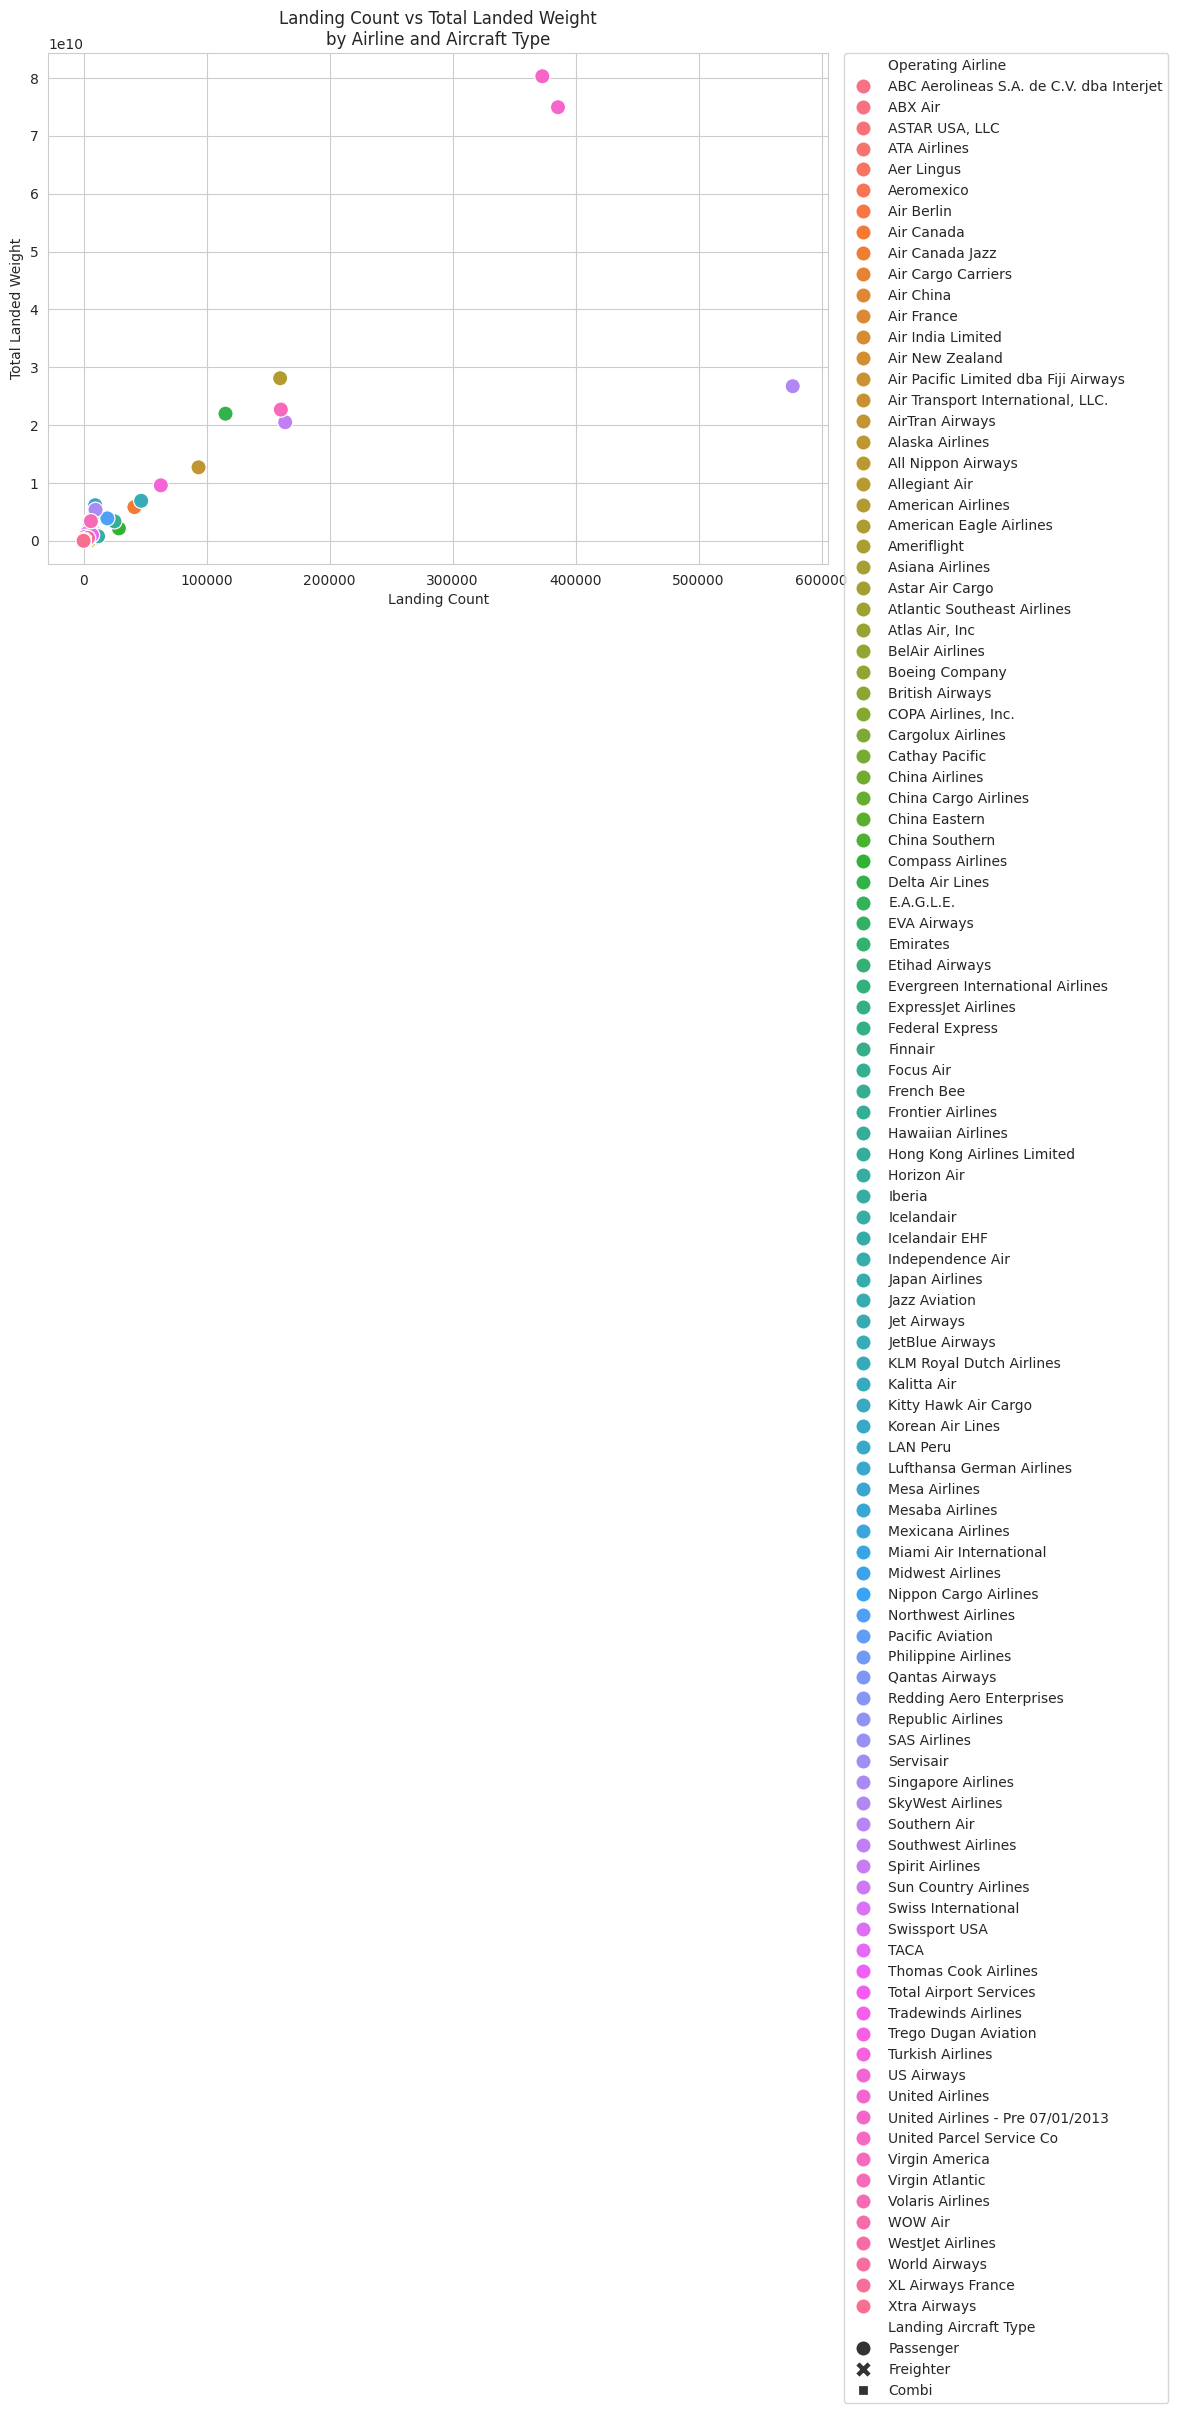

Correlation Matrix:
                      Landing Count  Total Landed Weight
Landing Count             1.000000             0.843122
Total Landed Weight       0.843122             1.000000


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group data
grouped_corr = (
    df.groupby(['Operating Airline', 'Landing Aircraft Type'])[['Landing Count', 'Total Landed Weight']]
    .sum()
    .reset_index()
)

# Scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=grouped_corr,
    x='Landing Count',
    y='Total Landed Weight',
    hue='Operating Airline',
    style='Landing Aircraft Type',
    s=120
)

plt.title('Landing Count vs Total Landed Weight\nby Airline and Aircraft Type')
plt.xlabel('Landing Count')
plt.ylabel('Total Landed Weight')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.subplots_adjust(left=0.1, right=0.75, top=0.88, bottom=0.15)

plt.show()

# Correlation matrix
correlation = grouped_corr[['Landing Count', 'Total Landed Weight']].corr()
print("Correlation Matrix:\n", correlation)


Dashboard Creation
I will be using Streamlit  because is works for air traffic landing analysis. And it can also be Published

In [104]:
pip install streamlit


In [105]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

st.set_page_config(layout="wide")
st.title("✈️ Air Traffic Landing Analysis Dashboard")

# Load the dataset
df = pd.read_csv("air-traffic-landings-statistics.csv")

# Fill missing values
df.fillna({
    'Operating Airline IATA Code': 'Unknown IATA',
    'Published Airline IATA Code': 'Unknown IATA',
    'Aircraft Model': 'Unknown Model',
    'Aircraft Version': 'Unknown Version',
    'Aircraft Manufacturer': 'Unknown Manufacturer',
    'Landing Aircraft Type': 'Unknown Type',
    'Aircraft Body Type': 'Unknown Body'
}, inplace=True)

# Convert Activity Period
df['Activity Period'] = pd.to_datetime(df['Activity Period'], format='%Y%m')

# Sidebar filter
airlines = df['Operating Airline'].unique()
selected_airlines = st.sidebar.multiselect("Filter by Operating Airline", airlines, default=airlines[:5])
filtered_df = df[df['Operating Airline'].isin(selected_airlines)]

# 1. Total Landed Weight by Airline and IATA Code
st.subheader("1. Total Landed Weight by Airline and IATA Code")
weight_df = filtered_df.groupby(['Operating Airline', 'Operating Airline IATA Code'])['Total Landed Weight'].sum().reset_index().sort_values(by='Total Landed Weight', ascending=False)
fig1 = px.bar(weight_df, x='Operating Airline', y='Total Landed Weight', color='Operating Airline IATA Code', title='Total Landed Weight by Airline and IATA Code')
st.plotly_chart(fig1, use_container_width=True)

# 2. Geographic Summary & Region Correlation with Landing Counts
st.subheader("2. Geographic Summaries & Regions vs Landing Counts")
geo_df = filtered_df.groupby(['GEO Summary', 'GEO Region'])['Landing Count'].sum().reset_index()
fig2 = px.sunburst(geo_df, path=['GEO Region', 'GEO Summary'], values='Landing Count', title='Landing Counts by Region and Summary')
st.plotly_chart(fig2, use_container_width=True)

# 3. Aircraft Manufacturers and Models Usage Comparison Across Airlines
st.subheader("3. Most Common Aircraft Manufacturers & Models by Airline")
manufacturer_df = filtered_df.groupby(['Aircraft Manufacturer', 'Aircraft Model', 'Operating Airline'])['Landing Count'].sum().reset_index().sort_values(by='Landing Count', ascending=False).head(20)
fig3 = px.bar(manufacturer_df, x='Landing Count', y='Aircraft Manufacturer', color='Operating Airline', orientation='h', title='Top Aircraft Manufacturers by Airline')
st.plotly_chart(fig3, use_container_width=True)

# 4. Landing Trends Over Time by Airline & Aircraft Type
st.subheader("4. Landing Trends Over Time")

trend_airline = filtered_df.groupby(['Activity Period', 'Operating Airline'])['Landing Count'].sum().reset_index()
fig4 = px.line(trend_airline, x='Activity Period', y='Landing Count', color='Operating Airline', title='Landing Trends Over Time by Airline')
st.plotly_chart(fig4, use_container_width=True)

trend_type = filtered_df.groupby(['Activity Period', 'Landing Aircraft Type'])['Landing Count'].sum().reset_index()
fig5 = px.line(trend_type, x='Activity Period', y='Landing Count', color='Landing Aircraft Type', title='Landing Trends Over Time by Aircraft Type')
st.plotly_chart(fig5, use_container_width=True)

# 5. Aircraft Body Type Distribution by Region and Airline
st.subheader("5. Aircraft Body Type Distribution")

body_region = filtered_df.groupby(['GEO Region', 'Aircraft Body Type']).size().reset_index(name='Count')
fig6 = px.sunburst(body_region, path=['GEO Region', 'Aircraft Body Type'], values='Count', title='Aircraft Body Types by Geographic Region')
st.plotly_chart(fig6, use_container_width=True)

body_airline = filtered_df.groupby(['Operating Airline', 'Aircraft Body Type']).size().reset_index(name='Count')
fig7 = px.bar(body_airline, x='Operating Airline', y='Count', color='Aircraft Body Type', barmode='stack', title='Aircraft Body Types Across Airlines')
st.plotly_chart(fig7, use_container_width=True)

# 6. Correlation Between Landing Count and Landed Weight
st.subheader("6. Correlation Between Landing Count and Total Landed Weight")

corr_df = filtered_df.groupby(['Operating Airline', 'Landing Aircraft Type'])[['Landing Count', 'Total Landed Weight']].sum().reset_index()
fig8, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=corr_df, x='Landing Count', y='Total Landed Weight', hue='Operating Airline', style='Landing Aircraft Type', s=100, ax=ax)
ax.set_title("Landing Count vs Total Landed Weight")
st.pyplot(fig8)

# Show correlation matrix
correlation = corr_df[['Landing Count', 'Total Landed Weight']].corr()
st.write("Correlation Matrix:")
st.dataframe(correlation)


2025-07-03 14:40:59.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 14:40:59.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [108]:
with open("air_traffic_dashboard.py", "w") as f:
    f.write("""import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

st.set_page_config(layout="wide")
st.title("✈️ Air Traffic Landing Analysis Dashboard")

# Load the dataset
df = pd.read_csv("Cleaned_Airtrafficdataset.csv")

# Fill missing values
df.fillna({
    'Operating Airline IATA Code': 'Unknown IATA',
    'Published Airline IATA Code': 'Unknown IATA',
    'Aircraft Model': 'Unknown Model',
    'Aircraft Version': 'Unknown Version',
    'Aircraft Manufacturer': 'Unknown Manufacturer',
    'Landing Aircraft Type': 'Unknown Type',
    'Aircraft Body Type': 'Unknown Body'
}, inplace=True)

# Convert Activity Period to datetime
df['Activity Period'] = pd.to_datetime(df['Activity Period'], format='%Y%m')

# Sidebar filter
airlines = df['Operating Airline'].unique()
selected_airlines = st.sidebar.multiselect("Filter by Operating Airline", airlines, default=airlines[:5])
filtered_df = df[df['Operating Airline'].isin(selected_airlines)]

# 1. Total Landed Weight by Airline and IATA Code
st.subheader("1. Total Landed Weight by Airline and IATA Code")
weight_df = filtered_df.groupby(['Operating Airline', 'Operating Airline IATA Code'])['Total Landed Weight'].sum().reset_index().sort_values(by='Total Landed Weight', ascending=False)
fig1 = px.bar(weight_df, x='Operating Airline', y='Total Landed Weight', color='Operating Airline IATA Code', title='Total Landed Weight by Airline and IATA Code')
st.plotly_chart(fig1, use_container_width=True)

# 2. Geographic Summary & Region vs Landing Count
st.subheader("2. Geographic Summaries & Regions vs Landing Counts")
geo_df = filtered_df.groupby(['GEO Summary', 'GEO Region'])['Landing Count'].sum().reset_index()
fig2 = px.sunburst(geo_df, path=['GEO Region', 'GEO Summary'], values='Landing Count', title='Landing Counts by Region and Summary')
st.plotly_chart(fig2, use_container_width=True)

# 3. Aircraft Manufacturers and Models by Airline
st.subheader("3. Most Common Aircraft Manufacturers & Models by Airline")
manufacturer_df = filtered_df.groupby(['Aircraft Manufacturer', 'Aircraft Model', 'Operating Airline'])['Landing Count'].sum().reset_index().sort_values(by='Landing Count', ascending=False).head(20)
fig3 = px.bar(manufacturer_df, x='Landing Count', y='Aircraft Manufacturer', color='Operating Airline', orientation='h', title='Top Aircraft Manufacturers by Airline')
st.plotly_chart(fig3, use_container_width=True)

# 4. Landing Trends Over Time by Airline and Aircraft Type
st.subheader("4. Landing Trends Over Time")

trend_airline = filtered_df.groupby(['Activity Period', 'Operating Airline'])['Landing Count'].sum().reset_index()
fig4 = px.line(trend_airline, x='Activity Period', y='Landing Count', color='Operating Airline', title='Landing Trends Over Time by Airline')
st.plotly_chart(fig4, use_container_width=True)

trend_type = filtered_df.groupby(['Activity Period', 'Landing Aircraft Type'])['Landing Count'].sum().reset_index()
fig5 = px.line(trend_type, x='Activity Period', y='Landing Count', color='Landing Aircraft Type', title='Landing Trends Over Time by Aircraft Type')
st.plotly_chart(fig5, use_container_width=True)

# 5. Aircraft Body Type Distribution by Region and Airline
st.subheader("5. Aircraft Body Type Distribution")

body_region = filtered_df.groupby(['GEO Region', 'Aircraft Body Type']).size().reset_index(name='Count')
fig6 = px.sunburst(body_region, path=['GEO Region', 'Aircraft Body Type'], values='Count', title='Aircraft Body Types by Geographic Region')
st.plotly_chart(fig6, use_container_width=True)

body_airline = filtered_df.groupby(['Operating Airline', 'Aircraft Body Type']).size().reset_index(name='Count')
fig7 = px.bar(body_airline, x='Operating Airline', y='Count', color='Aircraft Body Type', barmode='stack', title='Aircraft Body Types Across Airlines')
st.plotly_chart(fig7, use_container_width=True)

# 6. Correlation Between Landing Count and Total Landed Weight
st.subheader("6. Correlation Between Landing Count and Total Landed Weight")

corr_df = filtered_df.groupby(['Operating Airline', 'Landing Aircraft Type'])[['Landing Count', 'Total Landed Weight']].sum().reset_index()
fig8, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=corr_df, x='Landing Count', y='Total Landed Weight', hue='Operating Airline', style='Landing Aircraft Type', s=100, ax=ax)
ax.set_title("Landing Count vs Total Landed Weight")
st.pyplot(fig8)

# Show correlation matrix
correlation = corr_df[['Landing Count', 'Total Landed Weight']].corr()
st.write("Correlation Matrix:")
st.dataframe(correlation)
""")

files.download("Cleaned_Airtrafficdataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
from google.colab import files
files.download("air_traffic_dashboard.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>